<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Considereaciones_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARIMAX

Estos modelos son de mayor utilidad cuando se quiere estudiar series estacionales en donde puede ser interesante tomar en cuenta 12,24 o más retrasos en el tiempo.

Todos los modelos de series de tiempo tiene un equivalente estacional, donde:

$\bullet$ ARMA = SARMA 

$\bullet$ ARIMA = SARIMA

$\bullet$ ARIMAX =SARIMAX (p,d,q)(P,D,Q,s)

**(p,d,q)** ordenes estacionales y  **(P,D,Q,s)** ordenes no estacionales

**Ordenes estacionales**

$p=$ parámetro autorregresivo en el modelo

$d=$ Integraciones en el modelo

$q=$ parámetro de medias móviles en el modelo

$P=$ parámetro autorregresivo que es afectado por el parámetro **"s"** 

$D=$ parámetro de integración que es afectado por el parámetro **"s"**

$Q=$ parámetro de medias móviles que es afectado por el parámetro **"s"**

$s=$ parámetro estacional (Indica la cantidad de periodos en donde aparace el ciclo estacional) si el parámetro es 1, indicamos que no hay estacionalidad en el modelo.

**Ejemplo**

SARIMAX(1,0,2)(2,0,1,5) 

**Parte no estacional:** modelo con 1 retraso, 0 integraciones, 2 residuos

**Parte estacional:** valor retrasado de la variable en periodos de  en 5 en cinco con 1 retraso, 0 integraciones, 1 residuo con 2 retrasos, con ciclo de 5 retraso.

$x_{t}=c+\phi_{1}x_{t-1}+\theta_{1}\epsilon_{t-1}+\theta_{2}\epsilon_{t-2}+[\varphi_{1}(x_{t-5},x_{t-6})+\varphi_{2}(x_{t-10},x_{t-11})]+[\kappa(\epsilon_{t-5}+\epsilon_{t-6}+\epsilon_{t-7})]+\epsilon_{t}$

$\bullet$ AR = SAR

$\bullet$ MA =SMA

**Nota:** La **"S"** se agrega para denotar la estacionariedad del método.




## Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
#Cargamos los datos
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/virf96/curso-series-temporales/master/2.%20Serie%20temporal%20en%20R%20y%20Python/Python/Index2018.csv") 
#Copiamos la tabla en otra variable 
df_comp=raw_csv_data.copy()
#Convertimos la variable "date" en un variable de tipo fecha e indicamos que nuestra variable empieza con el día
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
#Indexamos la fecha para una mejor visualización
df_comp.set_index("date", inplace=True)
#Indicamos que la frecuencia es "business days"
df_comp=df_comp.asfreq('b')



In [4]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
#Veamos si no hay missings
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [6]:
#Rellenamos con el método front fill
df_comp=df_comp.fillna(method='ffill')

In [7]:
#Renombramos la variable ftse como "market_value"
df_comp['market_value']=df_comp.ftse

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Separamos el set de entrenamiento y prueba
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [10]:
#Definimos la prueba de log-verosimilitud para contraste de modelos
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [11]:
#Creamos los retornos (tasa de cambio entre un periodo y otro) de la variables "market_value"
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [12]:
#Iniciamos con el modelo más sencillo ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Tue, 21 Jul 2020   AIC                          55215.333
Time:                        16:15:24   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

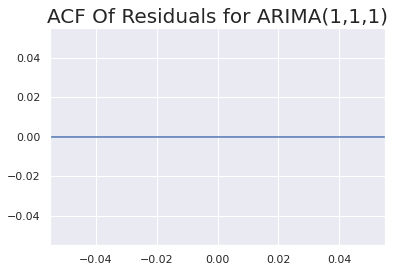

In [13]:
#Analizamos los residuos del modelo para poder visualizar que tipo de modelo es el que podría satisfacer nuestro problema
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [14]:
df.head()

,spx,dax,ftse,nikkei,market_value,returns,res_ar_1_i_1_ma_1
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,-5.965530
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,-27.627883
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,-43.711985
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,-15.569127


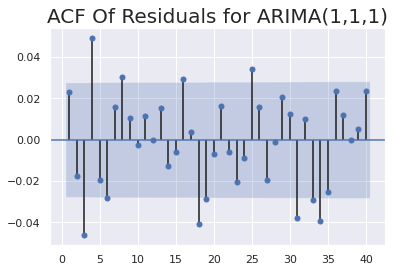

In [15]:
#Recordemos que por la tranformación de las variables, tenemos na en la primera fila
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
#Podemos visualizar que un modelo de orden 3 en sus componentes podría satisfacer al problema
plt.show()

## Higher-Lag ARIMA Models

In [16]:
#Modelos con los mejor resutados después de probar los diferentes modelos
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [17]:
#Nos quedamos con modelo ARIMA(1,1,3) COMO MODELO GANADOR
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27603.666412765342 	 AIC =  55215.332825530684
ARIMA(1,1,2):  	 LL =  -27600.081863115072 	 AIC =  55210.163726230145
ARIMA(1,1,3):  	 LL =  -27590.424032512823 	 AIC =  55192.848065025646
ARIMA(2,1,1):  	 LL =  -27599.807487862716 	 AIC =  55209.61497572543
ARIMA(3,1,1):  	 LL =  -27592.05537171564 	 AIC =  55196.11074343128
ARIMA(3,1,2):  	 LL =  -27590.660808971894 	 AIC =  55195.32161794379


In [18]:
#Hacemos contraste de log-varosimilitud para comprobar que sea mejor que los demás modelos
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [19]:
#Como las 2 pruebas sn significativas, nos quedamos con el ARIMA(1,1,3)
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0


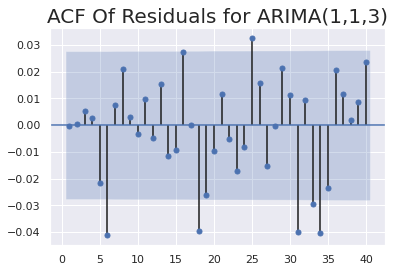

In [21]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
#Observamos que un modelo de orden 6 podría ser un mejor modelo
plt.show()

In [22]:
#Modelos con mejores resultados desués de probar las diferentes combinaciones
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [23]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Tue, 21 Jul 2020   AIC                          55189.024
Time:                        16:23:45   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5663      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.530      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4213      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3734           +0.0000j            2.3734            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
#Nos quedamos con el modelo ARIMA(5,1,1) como mejor modelo
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -27590.424032512823 	 AIC =  55192.848065025646
ARIMA(5,1,1):  	 LL =  -27586.51188810907 	 AIC =  55189.02377621814
ARIMA(6,1,3):  	 LL =  -27583.565320496647 	 AIC =  55189.130640993295


In [25]:
#Nos quedamos con el modelo ARIMA(5,1,1) dado que es significativamente mejor modelo
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.018


In [26]:
#Nos quedamos con el modelo ARIMA(5,1,1) dado el modelo ARIMA(6,1,3) no es significativamente mejor y además es más complejo
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.117


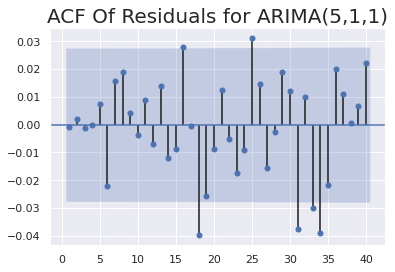

In [28]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
#Observamos que posiblemente hay un mejor modelo pero hasta el retraso 17 con lo cuál este modelo podría ser una solución
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [29]:
#Obtenermos la diferencia de los precios entre periodos de la variable "market_value"
df['delta_prices']=df.market_value.diff(1)

In [30]:
#ARIMA(1,0,1)=ARMA(1,1) ESTO DADO QUE YA HICIMOS LAS INTEGRACIÓN EN EL PASO ANTERIOR
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Tue, 21 Jul 2020   AIC                          55215.333
Time:                        16:29:10   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
#Hacemos prueba de dicky fuller para comprobar estacionariedad
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54845.96104221891)

In [33]:
#ARIMA(1,2,1) para ver los resultados con 2 integraciones
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=10)
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.159
Method:                       css-mle   S.D. of innovations             59.272
Date:                Tue, 21 Jul 2020   AIC                          55236.317
Time:                        16:30:33   BIC                          55262.401
Sample:                    01-11-1994   HQIC                         55245.457
                         - 04-05-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.202      0.840      -0.001       0.001
ar.L1.D2.market_value    -0.0178      0.014     -1.262      0.207      -0.045       0.010
ma.L1.D2.market_value    -1.0000      0.001  -1716.128      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.1374           +0.0000j           56.1374            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

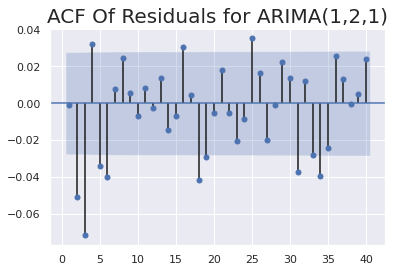

In [34]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX 

In [35]:
#Veamos si agregandole variables exogenas puede mejorar el modelo
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Tue, 21 Jul 2020   AIC                          55217.112
Time:                        16:31:20   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5904      2.655     -0.222      0.824      -5.795       4.614
spx                      0.0011      0.002      0.452      0.651      -0.004       0.006
ar.L1.D.market_value     0.7455      0.070     10.576      0.000       0.607       0.884
ma.L1.D.market_value    -0.7916      0.065    -12.271      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3413           +0.0000j            1.3413            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
#Combinamos lo encontrado al evaluar los diferentes modelos ARIMA para poder configurar la parte estacionaria del SARIMX
#SARIMAX(1,0,1)(2,0,1,5)
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
#Observamos el retraso de la parte autorregresiva del modelo y el residuo de la parte de medias móviles que se tomo de la parte no estacionaria
#Obseravamos para la parte estacionario la parte autorregresiva con ciclo de 5 periodos y 2 retrasos, además de el residuo de medias móviles con ciclo de 5 períodos y 1 retraso
#Observamos los p-values y todos los coeficientes son significativos conlo que podemos deducir que examinar la estacionalidad con este ciclo nos da un buen modelo
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.640
Date:                           Tue, 21 Jul 2020   AIC                          53439.280
Time:                                   16:33:20   BIC                          53484.930
Sample:                               01-07-1994   HQIC                         53455.277
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7050      0.035     76.296      0.000       2.636       2.774
ar.L1          0.9998      0.000   2168.277      0.000       0.999       1.001
ma.L1         -0.3102      0.010    -32.627      0.000      -0.329      -0.292
ar.S.L5        0.9651      0.011     90.384      0.000       0.944       0.986
ar.S.L10       0.0345      0.010      3.497      0.000       0.015       0.054
ma.S.L5       -0.9987      0.006   -173.006      0.000      -1.010      -0.987
sigma2      2442.8429     28.285     86.365      0.000    2387.405    2498.280
===================================================================================
Ljung-Box (Q):                       95.45   Jarque-Bera (JB):              4208.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""